In [116]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [117]:
data = pd.read_csv('model')

In [118]:
data = data.drop_duplicates()

In [119]:
data.shape

(3167, 10)

In [120]:
from bs4 import BeautifulSoup
import requests

In [121]:
url = "https://worldpopulationreview.com/country-rankings/list-of-countries-by-continent"

In [122]:
response = requests.get(url)
response.status_code

200

In [123]:
soup = BeautifulSoup(response.content, "html.parser")

In [124]:
a = soup.select("#dataTable > div.container.is-fluid.m-0 > div > div.column.is-8.is-clearfix.py-6 > div:nth-child(1) > div.datatable-container.undefined > table > tbody tr a")
b = soup.select("#dataTable > div.container.is-fluid.m-0 > div > div.column.is-8.is-clearfix.py-6 > div:nth-child(1) > div.datatable-container.undefined > table > tbody tr td:nth-child(2) ")

In [125]:
countries = []
continents = []
num_iter = len(a)
num_iter2 = len(b)
for i in range(num_iter):
    name = a
    countries.append(name[i].get_text())
for i in range(num_iter2):
    name = b
    continents.append(name[i].get_text())
print(continents)

['Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Africa', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Europe', 'Europe', 'Europe',

In [126]:
continents_countries = pd.DataFrame({"countries":countries,
                              "continents":continents
                             })

In [127]:
continents_countries =  dict(zip(continents_countries.countries, continents_countries.continents))
data['Continent'] = data['COUNTRY__C'].map(continents_countries)

In [128]:
len(countries)

234

In [129]:
data.isna().sum()

OUTCOME_SURVEY__C       0
COUNTRY__C              0
COUNTRY_CATEGORY__C     0
CURRENCYISOCODE_y       0
Industries              0
Number_countries        0
Profitability           0
Cust_satisf             0
Global_headcount        0
National_headcount      0
Continent              35
dtype: int64

In [130]:
t_correct = data[data['Continent'].isna()==True]

In [131]:
for x in countries:
    print(x)

Algeria
Angola
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Cape Verde
Central African Republic
Chad
Comoros
Djibouti
DR Congo
Egypt
Equatorial Guinea
Eritrea
Eswatini
Ethiopia
Gabon
Gambia
Ghana
Guinea
Guinea Bissau
Ivory Coast
Kenya
Lesotho
Liberia
Libya
Madagascar
Malawi
Mali
Mauritania
Mauritius
Mayotte
Morocco
Mozambique
Namibia
Niger
Nigeria
Republic of the Congo
Reunion
Rwanda
Sao Tome And Principe
Senegal
Seychelles
Sierra Leone
Somalia
South Africa
South Sudan
Sudan
Tanzania
Togo
Tunisia
Uganda
Western Sahara
Zambia
Zimbabwe
Afghanistan
Armenia
Azerbaijan
Bahrain
Bangladesh
Bhutan
Brunei
Cambodia
China
Georgia
Hong Kong
India
Indonesia
Iran
Iraq
Israel
Japan
Jordan
Kazakhstan
Kuwait
Kyrgyzstan
Laos
Lebanon
Macau
Malaysia
Maldives
Mongolia
Myanmar
Nepal
North Korea
Oman
Pakistan
Palestine
Philippines
Qatar
Saudi Arabia
Singapore
South Korea
Sri Lanka
Syria
Taiwan
Tajikistan
Thailand
Timor Leste
Turkey
Turkmenistan
United Arab Emirates
Uzbekistan
Vietnam
Yemen
Albania
Andorra
Au

In [132]:
t_correct.COUNTRY__C.value_counts()

Korea, South                  12
Hong Kong, China               9
Cote d'Ivoire                  6
Congo, Democratic Republic     4
Taiwan, China                  2
Macedonia                      2
Name: COUNTRY__C, dtype: int64

In [133]:
import numpy as np
data.loc[data['COUNTRY__C'] == 'Korea, South', 'COUNTRY__C'] = 'South Korea'
data.loc[data['COUNTRY__C'] == 'Hong Kong, China', 'COUNTRY__C'] = 'Hong Kong'
data.loc[data['COUNTRY__C'] == "Cote d'Ivoire", 'COUNTRY__C'] = 'Ivory Coast'
data.loc[data['COUNTRY__C'] == 'Congo, Democratic Republic', 'COUNTRY__C'] = 'Republic of the Congo'
data.loc[data['COUNTRY__C'] == 'Taiwan, China', 'COUNTRY__C'] = 'Taiwan'
data.loc[data['COUNTRY__C'] == 'Macedonia', 'COUNTRY__C'] = 'North Macedonia'
data.loc[data['OUTCOME_SURVEY__C'] == 'PASS', 'OUTCOME_SURVEY__C'] = 1
data.loc[data['OUTCOME_SURVEY__C'] == 'FAIL', 'OUTCOME_SURVEY__C'] = 0
data['OUTCOME_SURVEY__C']= data['OUTCOME_SURVEY__C'].astype(np.number)

In [134]:
data['Continent'] = data['COUNTRY__C'].map(continents_countries)

In [135]:
data.isna().sum()

OUTCOME_SURVEY__C      0
COUNTRY__C             0
COUNTRY_CATEGORY__C    0
CURRENCYISOCODE_y      0
Industries             0
Number_countries       0
Profitability          0
Cust_satisf            0
Global_headcount       0
National_headcount     0
Continent              0
dtype: int64

In [136]:
data.drop('Industries',axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3167 entries, 0 to 1158584
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   OUTCOME_SURVEY__C    3167 non-null   float64
 1   COUNTRY__C           3167 non-null   object 
 2   COUNTRY_CATEGORY__C  3167 non-null   object 
 3   CURRENCYISOCODE_y    3167 non-null   object 
 4   Number_countries     3167 non-null   float64
 5   Profitability        3167 non-null   object 
 6   Cust_satisf          3167 non-null   object 
 7   Global_headcount     3167 non-null   float64
 8   National_headcount   3167 non-null   float64
 9   Continent            3167 non-null   object 
dtypes: float64(4), object(6)
memory usage: 272.2+ KB


In [180]:
data.COUNTRY_CATEGORY__C.value_counts()

Core                2019
Emerging markets     790
Focus markets        358
Name: COUNTRY_CATEGORY__C, dtype: int64

<AxesSubplot:>

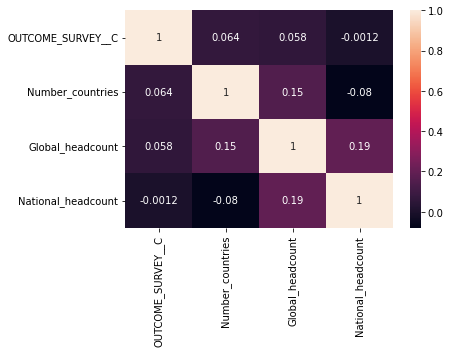

In [137]:
import seaborn as sns
correl_matrix_cont = data.corr()
sns.heatmap(correl_matrix_cont,annot=True)

In [138]:
data.to_csv('final_data.csv', index= False)

In [139]:
data.drop('COUNTRY__C',axis=1, inplace=True)

In [140]:
data.shape

(3167, 9)

In [141]:
data.OUTCOME_SURVEY__C.value_counts()

1.0    3136
0.0      31
Name: OUTCOME_SURVEY__C, dtype: int64

In [142]:
X = data.drop('OUTCOME_SURVEY__C',axis=1)
y = data['OUTCOME_SURVEY__C']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [143]:
imbalance = pd.concat([X_train,y_train],axis=1)

In [144]:
from sklearn.utils import resample
s_pass = imbalance[imbalance['OUTCOME_SURVEY__C'] == 1]
s_fail = imbalance[imbalance['OUTCOME_SURVEY__C'] == 0]

In [145]:
fail_oversampled = resample(s_fail,replace=True,n_samples = len(s_pass),random_state=0)

In [146]:
display(s_pass.shape)
display(fail_oversampled.shape)

(2506, 9)

(2506, 9)

In [147]:
imbalance = pd.concat([fail_oversampled,s_pass],axis=0)

In [148]:
imbalance = imbalance.sample(frac=1)

In [149]:
y_train = imbalance['OUTCOME_SURVEY__C']
X_train = imbalance.drop('OUTCOME_SURVEY__C',axis = 1)

In [150]:
import numpy as np
x_train_numerical = X_train.select_dtypes(np.number)
x_train_categorical = X_train.select_dtypes(object)

x_test_numerical = X_test.select_dtypes(np.number)
x_test_categorical = X_test.select_dtypes(object)

In [151]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(x_train_numerical)
normalized = transformer.transform(x_train_numerical)
normalized_x_train = pd.DataFrame(normalized,columns=x_train_numerical.columns)

In [152]:
normalized = transformer.transform(x_test_numerical)
normalized_x_test = pd.DataFrame(normalized,columns=x_test_numerical.columns)

In [153]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(x_train_categorical)
encoded_onehot = encoder.transform(x_train_categorical).toarray()
cols = encoder.get_feature_names(input_features=x_train_categorical.columns)
onehot_encoded_train = pd.DataFrame(encoded_onehot, columns=cols)

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [154]:
encoded_onehot = encoder.transform(x_test_categorical).toarray()
cols = encoder.get_feature_names(input_features=x_test_categorical.columns)
onehot_encoded_test = pd.DataFrame(encoded_onehot, columns=cols)

/Users/miguel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [155]:
X_train = pd.concat([normalized_x_train,onehot_encoded_train],axis=1)
X_test = pd.concat([normalized_x_test,onehot_encoded_test],axis=1)

In [156]:
X_train.isna().sum().sum()

0

In [157]:
X_test.isna().sum().sum()

0

In [158]:
y_train.isna().sum()

0

In [159]:
y_test.isna().sum().sum()

0

In [160]:
X_train.to_csv('x_train',index=False)
X_test.to_csv('x_test',index=False)

In [161]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=6)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [162]:
print("test data accuracy was ",model.score(X_test,y_test))

print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.917981072555205
train data accuracy was  0.9555067837190743


In [163]:
max_depth = range(1,30)
test = []
train = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

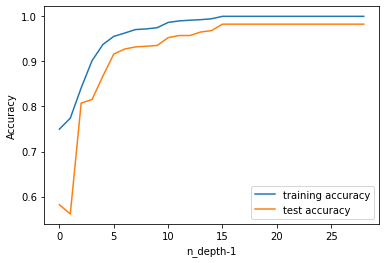

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth-1")
plt.legend()

In [172]:
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [173]:
print("test data accuracy was ",model.score(X_test,y_test))

print("train data accuracy was ",model.score(X_train,y_train))

test data accuracy was  0.8675078864353313
train data accuracy was  0.9375498802873105


In [174]:
list_pred = model.predict(X_test)
list_test = y_test.to_list()


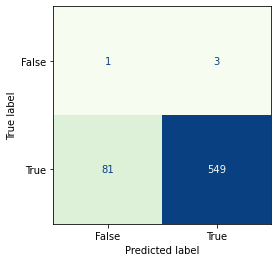

In [175]:
from sklearn import metrics
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(list_test, list_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot(cmap = 'GnBu',colorbar=False)
plt.show()

<AxesSubplot:>

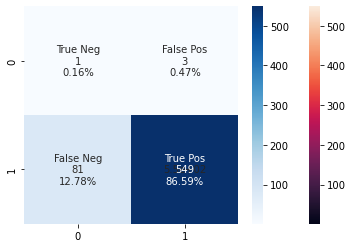

In [178]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [181]:
data.OUTCOME_SURVEY__C.value_counts()

1.0    3136
0.0      31
Name: OUTCOME_SURVEY__C, dtype: int64